<a href="https://colab.research.google.com/github/rabiaabass/CV_HTML/blob/master/makam_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')
test_path = "/content/drive/MyDrive/makam_proje/data/hicaz/hicaz1.m4a"
print(test_path)


import librosa

try:
    y, sr = librosa.load(test_path, sr=22050, mono=True)
    print("Başarılı! Dosya yüklendi.")
    print("Sinyal uzunluğu:", len(y))
    print("Örnekleme oranı:", sr)
except Exception as e:
    print("HATA: Librosa m4a dosyasını okuyamadı!")
    print(e)

Mounted at /content/drive
/content/drive/MyDrive/makam_proje/data/hicaz/hicaz1.m4a


/tmp/ipython-input-3655906914.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(test_path, sr=22050, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Başarılı! Dosya yüklendi.
Sinyal uzunluğu: 4099072
Örnekleme oranı: 22050


In [8]:
import os

DATA_DIR = "/content/drive/MyDrive/makam_proje/data"

makam_folders = {
    "hicaz":   "hicaz",
    "segah":   "segah",
    "nihavend":"nihavend",
    "rast":    "rast",
    "uşşak":   "ussak",  # klasör: ussak, etiket: uşşak
}

print("Ana klasör:", DATA_DIR)
print("İçindeki klasörler:", os.listdir(DATA_DIR))

Ana klasör: /content/drive/MyDrive/makam_proje/data
İçindeki klasörler: ['hicaz', 'segah', 'nihavend', 'rast', 'ussak']


In [9]:
import librosa
import numpy as np

def extract_features(path, sr_target=22050, duration=10):
    # 1) Ses dosyasını yükle
    y, sr = librosa.load(path, sr=sr_target, mono=True)
    # 2) Çok uzunsa ilk 10 saniyeyi al
    y = y[:sr_target * duration]

    # 3) MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_mean, mfcc_std = mfcc.mean(axis=1), mfcc.std(axis=1)

    # 4) Chroma
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_mean, chroma_std = chroma.mean(axis=1), chroma.std(axis=1)

    # 5) Spectral centroid
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_cent_mean, spec_cent_std = spec_cent.mean(axis=1), spec_cent.std(axis=1)

    # 6) Zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean, zcr_std = zcr.mean(axis=1), zcr.std(axis=1)

    # 7) Hepsini tek vektörde birleştir
    feature_vector = np.hstack([
        mfcc_mean, mfcc_std,
        chroma_mean, chroma_std,
        spec_cent_mean, spec_cent_std,
        zcr_mean, zcr_std
    ])

    return feature_vector


In [10]:
X = []
y = []

for label, folder_name in makam_folders.items():
    folder_path = os.path.join(DATA_DIR, folder_name)
    files = os.listdir(folder_path)

    # Boş klasör güvenliği
    if len(files) == 0:
        print("UYARI: Klasör boş:", folder_path)
        continue

    # Şimdilik ilk bulunan dosyayı kullanıyoruz
    file_path = os.path.join(folder_path, files[0])

    print("İşlenen:", file_path, "→ Etiket:", label)

    features = extract_features(file_path)
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("X şekli:", X.shape)  # (ör: 5, 72)
print("y:", y)


İşlenen: /content/drive/MyDrive/makam_proje/data/hicaz/hicaz1.m4a → Etiket: hicaz


/tmp/ipython-input-3652939402.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=sr_target, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


İşlenen: /content/drive/MyDrive/makam_proje/data/segah/segah2.m4a → Etiket: segah


/tmp/ipython-input-3652939402.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=sr_target, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


İşlenen: /content/drive/MyDrive/makam_proje/data/nihavend/nihavend1.m4a → Etiket: nihavend


/tmp/ipython-input-3652939402.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=sr_target, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


İşlenen: /content/drive/MyDrive/makam_proje/data/rast/rast1.m4a → Etiket: rast


/tmp/ipython-input-3652939402.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=sr_target, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


İşlenen: /content/drive/MyDrive/makam_proje/data/ussak/ussak1.m4a → Etiket: uşşak


/tmp/ipython-input-3652939402.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=sr_target, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


X şekli: (5, 68)
y: ['hicaz' 'segah' 'nihavend' 'rast' 'uşşak']


In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", C=10, gamma="scale")
)

clf.fit(X, y)

tahminler = clf.predict(X)
print("Tahminler:", tahminler)


Tahminler: ['hicaz' 'segah' 'nihavend' 'rast' 'uşşak']


Veri işleme başlıyor...

Klasör: hicaz - Toplam Dosya: 3


/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python


Klasör: segah - Toplam Dosya: 3


/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python


Klasör: nihavend - Toplam Dosya: 3


/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python


Klasör: rast - Toplam Dosya: 3


/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python


Klasör: uşşak - Toplam Dosya: 3


/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-248096449.py:74: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python


İşlem Tamamlandı!
Toplam Veri Sayısı (Segmentler): 282
Öznitelik Vektör Boyutu: 68

Model eğitiliyor...

--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

       hicaz       1.00      1.00      1.00        10
    nihavend       1.00      1.00      1.00        11
        rast       1.00      0.91      0.95        11
       segah       0.93      1.00      0.96        13
       uşşak       1.00      1.00      1.00        12

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



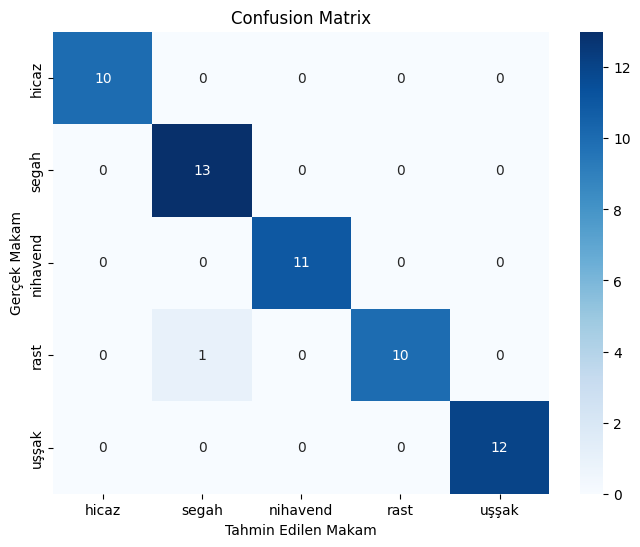

In [12]:
import librosa
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- AYARLAR ---
DATA_DIR = "/content/drive/MyDrive/makam_proje/data"
SEGMENT_SURESI = 10  # Saniye
SR = 22050

makam_folders = {
    "hicaz":   "hicaz",
    "segah":   "segah",
    "nihavend":"nihavend",
    "rast":    "rast",
    "uşşak":   "ussak",
}

# --- 1. ÖZELLİK ÇIKARMA FONKSİYONU (Revize Edildi) ---
# Artık path değil, doğrudan ses verisi (y) alıyor.
def extract_features_from_segment(y, sr):
    # a) MFCC (Tını)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_mean, mfcc_std = mfcc.mean(axis=1), mfcc.std(axis=1)

    # b) Chroma (Makam/Nota Dizisi - En Önemlisi)
    # CQT müzik için STFT'den daha iyidir, doğru tercih yapmışsın.
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_mean, chroma_std = chroma.mean(axis=1), chroma.std(axis=1)

    # c) Spectral Centroid (Parlaklık)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_cent_mean, spec_cent_std = spec_cent.mean(axis=1), spec_cent.std(axis=1)

    # d) Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean, zcr_std = zcr.mean(axis=1), zcr.std(axis=1)

    # Vektör Birleştirme
    feature_vector = np.hstack([
        mfcc_mean, mfcc_std,
        chroma_mean, chroma_std,
        spec_cent_mean, spec_cent_std,
        zcr_mean, zcr_std
    ])

    return feature_vector

# --- 2. VERİ YÜKLEME VE SEGMENTASYON DÖNGÜSÜ ---
X = []
y_labels = []

print("Veri işleme başlıyor...")

for label, folder_name in makam_folders.items():
    folder_path = os.path.join(DATA_DIR, folder_name)

    # Klasördeki tüm dosyaları al (Sadece ses dosyaları)
    files = [f for f in os.listdir(folder_path) if f.endswith(('.mp3', '.wav', '.m4a'))]

    print(f"\nKlasör: {label} - Toplam Dosya: {len(files)}")

    for filename in files:
        file_path = os.path.join(folder_path, filename)

        try:
            # Dosyayı yükle
            y, sr = librosa.load(file_path, sr=SR, mono=True)

            # --- SEGMENTASYON ---
            # Şarkıyı 10'ar saniyelik dilimlere bölüyoruz
            num_samples_per_segment = int(SEGMENT_SURESI * SR)
            total_samples = len(y)

            # Kaydırma (Sliding) işlemi
            for start in range(0, total_samples, num_samples_per_segment):
                end = start + num_samples_per_segment

                # Eğer son parça 10 saniyeden kısaysa (örneğin şarkı sonu), onu atlayalım
                # Veri temizliği için önemli.
                if end > total_samples:
                    break

                segment = y[start:end]

                # Segmentin özelliklerini çıkar
                features = extract_features_from_segment(segment, sr)

                X.append(features)
                y_labels.append(label)

        except Exception as e:
            print(f"Hata ({filename}): {e}")

X = np.array(X)
y_labels = np.array(y_labels)

print(f"\nİşlem Tamamlandı!")
print(f"Toplam Veri Sayısı (Segmentler): {len(X)}")
print(f"Öznitelik Vektör Boyutu: {X.shape[1]}")

# --- 3. EĞİTİM VE TEST ---

# Veriyi karıştır ve ayır (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# Model Pipeline
clf = make_pipeline(
    StandardScaler(), # SVM için veriyi ölçeklemek şarttır
    SVC(kernel="rbf", C=10, gamma="scale")
)

print("\nModel eğitiliyor...")
clf.fit(X_train, y_train)

# --- 4. SONUÇLARI RAPORLA ---
y_pred = clf.predict(X_test)

print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi (Hangi makam hangisiyle karışıyor?)
cm = confusion_matrix(y_test, y_pred, labels=list(makam_folders.keys()))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=makam_folders.keys(), yticklabels=makam_folders.keys(), cmap='Blues')
plt.ylabel('Gerçek Makam')
plt.xlabel('Tahmin Edilen Makam')
plt.title('Confusion Matrix')
plt.show()

In [14]:
def predict_new_song(file_path, model):
    # 1. Dosyayı yükle
    try:
        y, sr = librosa.load(file_path, sr=22050, mono=True)
    except:
        return "Dosya okunamadı!"

    # 2. Şarkıdan rastgele 3 tane 10 saniyelik parça alıp ortalamasına bakalım
    # (Veya sadece en baştan 10 saniye alalım şimdilik)
    y_segment = y[:22050*10]

    if len(y_segment) < 22050*10:
        return "Dosya çok kısa!"

    # 3. Özellikleri çıkar (Aynı fonksiyonu kullanıyoruz)
    features = extract_features_from_segment(y_segment, sr)

    # 4. SVM tek bir örnek beklediği için boyutu (1, 68) yapıyoruz
    features = features.reshape(1, -1)

    # 5. Tahmin
    prediction = model.predict(features)
    return prediction[0]

# --- TEST ---
# Buraya datasetinizde OLMAYAN, internetten yeni indirdiğiniz bir şarkı yükleyin
# Örneğin: "yeni_hicaz_sarkisi.mp3"
new_file_path = "/content/drive/MyDrive/denememakam.m4a"

# Eğer elinizde dosya yoksa drive'a atıp yolunu buraya yazın
print(f"Tahmin Edilen Makam: {predict_new_song(new_file_path, clf)}")

/tmp/ipython-input-3237462967.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=22050, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Tahmin Edilen Makam: rast


Veriler dosya bazlı ayrıştırılıyor (Data Leakage Önleniyor)...
Makam: hicaz -> Eğitim Dosyası: 2, Test Dosyası: 1


/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/pyt

Makam: segah -> Eğitim Dosyası: 2, Test Dosyası: 1


/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/pyt

Makam: nihavend -> Eğitim Dosyası: 2, Test Dosyası: 1


/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/pyt

Makam: rast -> Eğitim Dosyası: 2, Test Dosyası: 1


/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/pyt

Makam: ussak -> Eğitim Dosyası: 2, Test Dosyası: 1


/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-1922141527.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/pyt


Son Durum:
Eğitim için toplam parça (segment) sayısı: 188
Test için toplam parça (segment) sayısı: 94

Model Eğitiliyor (Bu sefer ezberleyemez)...

--- GERÇEK SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

       hicaz       0.35      0.39      0.37        18
    nihavend       1.00      0.18      0.30        17
        rast       0.35      0.54      0.42        13
       segah       0.40      0.67      0.50        27
       ussak       0.83      0.26      0.40        19

    accuracy                           0.43        94
   macro avg       0.59      0.41      0.40        94
weighted avg       0.58      0.43      0.41        94



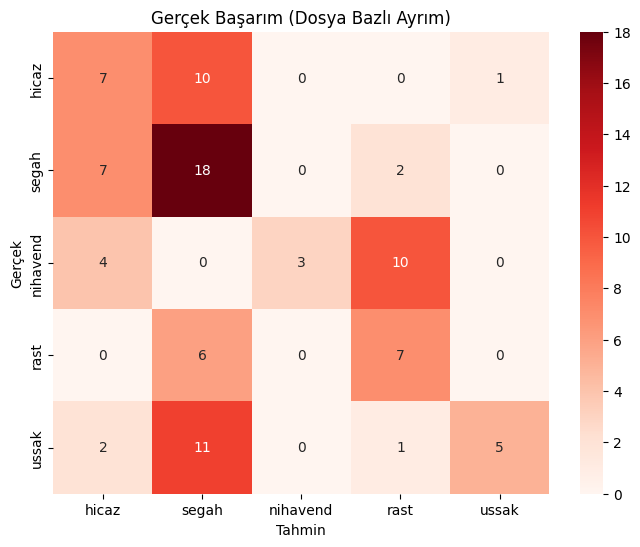

In [15]:
import librosa
import numpy as np
import os
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- AYARLAR ---
DATA_DIR = "/content/drive/MyDrive/makam_proje/data"
SEGMENT_SURESI = 10
SR = 22050

makam_folders = {
    "hicaz": "hicaz",
    "segah": "segah",
    "nihavend": "nihavend",
    "rast": "rast",
    "ussak": "ussak", # Klasör ismine dikkat (Türkçe karakter olmasın)
}

# --- FONKSIYON: SADECE DOSYA LİSTESİ ALIP X, y ÜRETEN YAPI ---
def create_dataset_from_files(file_list, label_name):
    X_temp = []
    y_temp = []

    for file_path in file_list:
        try:
            y, sr = librosa.load(file_path, sr=SR, mono=True)

            # Segmentasyon (Parçalama)
            num_samples_per_segment = int(SEGMENT_SURESI * SR)
            total_samples = len(y)

            for start in range(0, total_samples, num_samples_per_segment):
                end = start + num_samples_per_segment
                if end > total_samples: break

                segment = y[start:end]

                # --- ÖZELLİK ÇIKARMA (Feature Extraction) ---
                # 1. MFCC
                mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=20)
                mfcc_stats = np.hstack([mfcc.mean(axis=1), mfcc.std(axis=1)])

                # 2. Chroma (CQT)
                chroma = librosa.feature.chroma_cqt(y=segment, sr=sr)
                chroma_stats = np.hstack([chroma.mean(axis=1), chroma.std(axis=1)])

                # 3. Spectral Centroid
                cent = librosa.feature.spectral_centroid(y=segment, sr=sr)
                cent_stats = np.hstack([cent.mean(axis=1), cent.std(axis=1)])

                # Birleştir
                features = np.hstack([mfcc_stats, chroma_stats, cent_stats])

                X_temp.append(features)
                y_temp.append(label_name)

        except Exception as e:
            print(f"Hata: {file_path} -> {e}")

    return X_temp, y_temp

# --- ANA DÖNGÜ: DOSYA BAZLI AYRIM (FILE-BASED SPLIT) ---
X_train = []
y_train = []
X_test = []
y_test = []

print("Veriler dosya bazlı ayrıştırılıyor (Data Leakage Önleniyor)...")

for label, folder_name in makam_folders.items():
    folder_path = os.path.join(DATA_DIR, folder_name)
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.mp3', '.wav', '.m4a'))]

    # KARIŞTIR
    random.shuffle(all_files)

    # %80 EĞİTİM, %20 TEST olarak dosyaları ayır
    split_point = int(len(all_files) * 0.8)
    train_files = all_files[:split_point]
    test_files = all_files[split_point:]

    print(f"Makam: {label} -> Eğitim Dosyası: {len(train_files)}, Test Dosyası: {len(test_files)}")

    # Eğitim verisini işle
    x_tr, y_tr = create_dataset_from_files(train_files, label)
    X_train.extend(x_tr)
    y_train.extend(y_tr)

    # Test verisini işle
    x_te, y_te = create_dataset_from_files(test_files, label)
    X_test.extend(x_te)
    y_test.extend(y_te)

# Numpy formatına çevir
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"\nSon Durum:")
print(f"Eğitim için toplam parça (segment) sayısı: {len(X_train)}")
print(f"Test için toplam parça (segment) sayısı: {len(X_test)}")

# --- MODEL EĞİTİMİ ---
print("\nModel Eğitiliyor (Bu sefer ezberleyemez)...")
clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", C=10, gamma='scale')
)

clf.fit(X_train, y_train)

# --- SONUÇLAR ---
print("\n--- GERÇEK SINIFLANDIRMA RAPORU ---")
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=list(makam_folders.keys()))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=makam_folders.keys(), yticklabels=makam_folders.keys(), cmap='Reds')
plt.title('Gerçek Başarım (Dosya Bazlı Ayrım)')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

# 1. Denenecek parametreler
param_grid = {
    'svc__C': [0.1, 1, 10, 100],           # Hata toleransı
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001], # Hassaslık
    'svc__kernel': ['rbf', 'poly']         # Matematiksel yaklaşım
}

# 2. Grid Search Tanımla
grid = GridSearchCV(
    make_pipeline(StandardScaler(), SVC()),
    param_grid,
    refit=True,
    verbose=2,
    cv=3 # 3 Katlı çapraz doğrulama
)

print("En iyi ayarlar aranıyor (Biraz sürebilir)...")
grid.fit(X_train, y_train)

# 3. Sonuçlar
print(f"\nEN İYİ PARAMETRELER: {grid.best_params_}")
print(f"EN İYİ SKOR (Eğitim seti): {grid.best_score_}")

# 4. Test Setiyle Gerçek Sınav
grid_predictions = grid.predict(X_test)
print("\n--- İYİLEŞTİRİLMİŞ SONUÇLAR ---")
print(classification_report(y_test, grid_predictions))

En iyi ayarlar aranıyor (Biraz sürebilir)...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=auto, svc__kernel=poly; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=auto, svc__kernel=poly; total time=   0.0s
[C

In [18]:
import librosa
import numpy as np
import os

# Grid Search ile bulduğun en iyi modeli (grid) kullanacağız.

def predict_new_song_corrected(file_path, model):
    print(f"İşleniyor: {file_path}")

    if not os.path.exists(file_path):
        return "HATA: Dosya bulunamadı!"

    try:
        # 1. Yükle
        y, sr = librosa.load(file_path, sr=22050, mono=True)

        # 2. İlk 10 saniyeyi al (Eğitim verisiyle uyum için)
        if len(y) > 22050 * 10:
            y = y[:22050*10]

        # --- ÖZELLİK ÇIKARMA (Eğitimdeki mantığın AYNISI - 66 Özellik) ---

        # A) MFCC (40 özellik)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        mfcc_stats = np.hstack([mfcc.mean(axis=1), mfcc.std(axis=1)])

        # B) Chroma (24 özellik)
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
        chroma_stats = np.hstack([chroma.mean(axis=1), chroma.std(axis=1)])

        # C) Spectral Centroid (2 özellik)
        cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        cent_stats = np.hstack([cent.mean(axis=1), cent.std(axis=1)])

        # D) Zero Crossing Rate YOK! (Eğitimde kullanmadık)

        # Birleştir (40 + 24 + 2 = 66)
        features = np.hstack([mfcc_stats, chroma_stats, cent_stats])

        # Modelin beklediği şekle (1, 66) getir
        features = features.reshape(1, -1)

        # Tahmin et
        prediction = model.predict(features)
        return prediction[0]

    except Exception as e:
        return f"HATA OLUŞTU: {e}"

# --- TEST ET ---
yeni_sarki_yolu = "/content/drive/MyDrive/denememakam.m4a" # Yolunu kontrol et

print("-" * 30)
sonuc = predict_new_song_corrected(yeni_sarki_yolu, grid)
print(f"TAHMİN EDİLEN MAKAM: {sonuc}")
print("-" * 30)

------------------------------
İşleniyor: /content/drive/MyDrive/denememakam.m4a


/tmp/ipython-input-3052166774.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=22050, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


TAHMİN EDİLEN MAKAM: rast
------------------------------


In [19]:
import librosa
import numpy as np
import os
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- AYARLAR ---
DATA_DIR = "/content/drive/MyDrive/makam_proje/data"
SEGMENT_SURESI = 10
SR = 22050
makam_folders = {"hicaz": "hicaz", "segah": "segah", "nihavend": "nihavend", "rast": "rast", "ussak": "ussak"}

# --- YENİ FONKSİYON: SADECE CHROMA (NOTA) ODAKLI ---
def extract_chroma_only(y, sr):
    # CQT (Constant-Q Transform) Türk müziği frekansları için STFT'den daha iyidir
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=12)

    # Ortalama ve Standart Sapma
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)

    # Sadece bunları birleştiriyoruz (Toplam 24 özellik)
    return np.hstack([chroma_mean, chroma_std])

# --- VERİ HAZIRLAMA (DOSYA BAZLI AYRIM - LEAKAGE YOK) ---
def create_dataset_chroma(file_list, label_name):
    X_temp, y_temp = [], []
    for file_path in file_list:
        try:
            y, sr = librosa.load(file_path, sr=SR, mono=True)
            # Segmentasyon
            step = int(SEGMENT_SURESI * SR)
            for start in range(0, len(y), step):
                end = start + step
                if end > len(y): break
                segment = y[start:end]

                # SADECE CHROMA ÇIKAR
                features = extract_chroma_only(segment, sr)
                X_temp.append(features)
                y_temp.append(label_name)
        except: pass
    return X_temp, y_temp

# --- EĞİTİM DÖNGÜSÜ ---
X_train, y_train, X_test, y_test = [], [], [], []
print("Sadece Chroma özellikleri ile veri hazırlanıyor...")

for label, folder_name in makam_folders.items():
    folder_path = os.path.join(DATA_DIR, folder_name)
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.mp3', '.wav', '.m4a'))]
    random.shuffle(all_files)

    split = int(len(all_files) * 0.8)

    # Train
    xt, yt = create_dataset_chroma(all_files[:split], label)
    X_train.extend(xt); y_train.extend(yt)

    # Test
    xv, yv = create_dataset_chroma(all_files[split:], label)
    X_test.extend(xv); y_test.extend(yv)

print(f"Eğitim: {len(X_train)} parça, Test: {len(X_test)} parça")

# --- MODEL EĞİTİMİ ---
clf_chroma = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=10, gamma='scale'))
clf_chroma.fit(X_train, y_train)

# --- SONUÇLAR ---
print("\n--- SADECE CHROMA BAŞARISI ---")
print(classification_report(y_test, clf_chroma.predict(X_test)))

# --- DIŞARIDAN GELEN ŞARKIYI TEST ET ---
# Buraya kendi test dosyanın yolunu yaz
yeni_dosya = "/content/drive/MyDrive/denememakam.m4a"

try:
    y_new, sr_new = librosa.load(yeni_dosya, sr=SR, mono=True)
    if len(y_new) > SR*10: y_new = y_new[:SR*10]

    feat_new = extract_chroma_only(y_new, sr_new).reshape(1, -1)
    tahmin = clf_chroma.predict(feat_new)[0]

    print("="*30)
    print(f"DIŞARIDAN GELEN ŞARKI TAHMİNİ: {tahmin}")
    print("="*30)
except Exception as e:
    print("Test dosyası hatası:", e)

Sadece Chroma özellikleri ile veri hazırlanıyor...


/tmp/ipython-input-719027498.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-719027498.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-719027498.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python

Eğitim: 191 parça, Test: 91 parça

--- SADECE CHROMA BAŞARISI ---
              precision    recall  f1-score   support

       hicaz       0.80      0.76      0.78        21
    nihavend       0.40      0.12      0.18        17
        rast       0.52      0.65      0.58        17
       segah       0.17      0.18      0.17        17
       ussak       0.00      0.00      0.00        19

    accuracy                           0.35        91
   macro avg       0.38      0.34      0.34        91
weighted avg       0.39      0.35      0.35        91



/tmp/ipython-input-719027498.py:84: UserWarning: PySoundFile failed. Trying audioread instead.
  y_new, sr_new = librosa.load(yeni_dosya, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


DIŞARIDAN GELEN ŞARKI TAHMİNİ: rast


In [22]:
import librosa
import numpy as np
import os
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- AYARLAR ---
DATA_DIR = "/content/drive/MyDrive/makam_proje/data"
SEGMENT_SURESI = 10
SR = 22050
makam_folders = {"hicaz": "hicaz", "segah": "segah", "nihavend": "nihavend", "rast": "rast", "ussak": "ussak"}

# --- KRİTİK DEĞİŞİKLİK: MİKROTONAL CHROMA ---
def extract_microtonal_features(y, sr):
    # n_chroma=36 demek, bir oktavı 12 değil 36 parçaya böl demektir.
    # Böylece koma sesler (çeyrek sesler) kaybolmaz, ayrı bir "kutuya" düşer.
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=36, bins_per_octave=36)

    # İstatistikler
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)

    # Ayrıca Spectral Contrast da ekleyelim (Tınıyı desteklemek için)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    contrast_mean = np.mean(contrast, axis=1)

    return np.hstack([chroma_mean, chroma_std, contrast_mean])

# --- VERİ HAZIRLAMA (DOSYA BAZLI - LEAKAGE YOK) ---
def create_dataset_micro(file_list, label_name):
    X_temp, y_temp = [], []
    for file_path in file_list:
        try:
            y, sr = librosa.load(file_path, sr=SR, mono=True)
            step = int(SEGMENT_SURESI * SR)
            for start in range(0, len(y), step):
                end = start + step
                if end > len(y): break
                segment = y[start:end]

                features = extract_microtonal_features(segment, sr)
                X_temp.append(features)
                y_temp.append(label_name)
        except: pass
    return X_temp, y_temp

# --- ANA EĞİTİM DÖNGÜSÜ ---
X_train, y_train, X_test, y_test = [], [], [], []
print("Mikrotonal (Koma Sesli) Analiz Başlıyor...")

for label, folder_name in makam_folders.items():
    folder_path = os.path.join(DATA_DIR, folder_name)
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.mp3', '.wav', '.m4a'))]
    random.shuffle(all_files)

    split = int(len(all_files) * 0.8) # %80 Eğitim

    xt, yt = create_dataset_micro(all_files[:split], label)
    X_train.extend(xt); y_train.extend(yt)

    xv, yv = create_dataset_micro(all_files[split:], label)
    X_test.extend(xv); y_test.extend(yv)

print(f"Eğitim Seti: {len(X_train)} segment")

# --- MODEL (C parametresini biraz artırdık, karmaşık veriyi öğrensin diye) ---
clf_micro = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=20, gamma='scale'))
clf_micro.fit(X_train, y_train)

# --- SONUÇLAR ---
print("\n--- MİKROTONAL BAŞARI RAPORU ---")
print(classification_report(y_test, clf_micro.predict(X_test)))

# --- DIŞARIDAN GELEN ŞARKIYI TEST ET ---
yeni_dosya = "/content/drive/MyDrive/hicaz_deneme.m4a" # Dosya yolunu kontrol et!

try:
    print(f"\nTest Dosyası İşleniyor: {yeni_dosya}")
    y_new, sr_new = librosa.load(yeni_dosya, sr=SR, mono=True)
    if len(y_new) > SR*10: y_new = y_new[:SR*10] # İlk 10 saniye

    # Aynı özellik çıkarma fonksiyonu kullanılmalı
    feat_new = extract_microtonal_features(y_new, sr_new).reshape(1, -1)

    tahmin = clf_micro.predict(feat_new)[0]
    print("="*40)
    print(f"SONUÇ: {tahmin.upper()}")
    print("="*40)
except Exception as e:
    print("Test hatası:", e)

Mikrotonal (Koma Sesli) Analiz Başlıyor...


/tmp/ipython-input-222317603.py:40: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-222317603.py:40: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-222317603.py:40: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python

Eğitim Seti: 192 segment

--- MİKROTONAL BAŞARI RAPORU ---
              precision    recall  f1-score   support

       hicaz       0.29      0.94      0.44        17
    nihavend       0.25      0.12      0.16        17
        rast       0.62      0.47      0.53        17
       segah       0.36      0.15      0.21        27
       ussak       0.00      0.00      0.00        12

    accuracy                           0.33        90
   macro avg       0.30      0.34      0.27        90
weighted avg       0.33      0.33      0.28        90


Test Dosyası İşleniyor: /content/drive/MyDrive/hicaz_deneme.m4a


/tmp/ipython-input-222317603.py:85: UserWarning: PySoundFile failed. Trying audioread instead.
  y_new, sr_new = librosa.load(yeni_dosya, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


SONUÇ: HICAZ


In [21]:
import joblib

# 1. Modeli Kaydetme
model_kayit_yolu = "/content/drive/MyDrive/makam_modeli_microtonal.pkl"
joblib.dump(clf_micro, model_kayit_yolu)

print(f"Model başarıyla kaydedildi: {model_kayit_yolu}")
print("Artık bu dosyayı indirip istediğin yerde kullanabilirsin!")

# --- NASIL GERİ YÜKLERSİN? (İleride lazım olursa diye) ---
# yuklenen_model = joblib.load(model_kayit_yolu)
# tahmin = yuklenen_model.predict(yeni_ozellikler)

Model başarıyla kaydedildi: /content/drive/MyDrive/makam_modeli_microtonal.pkl
Artık bu dosyayı indirip istediğin yerde kullanabilirsin!


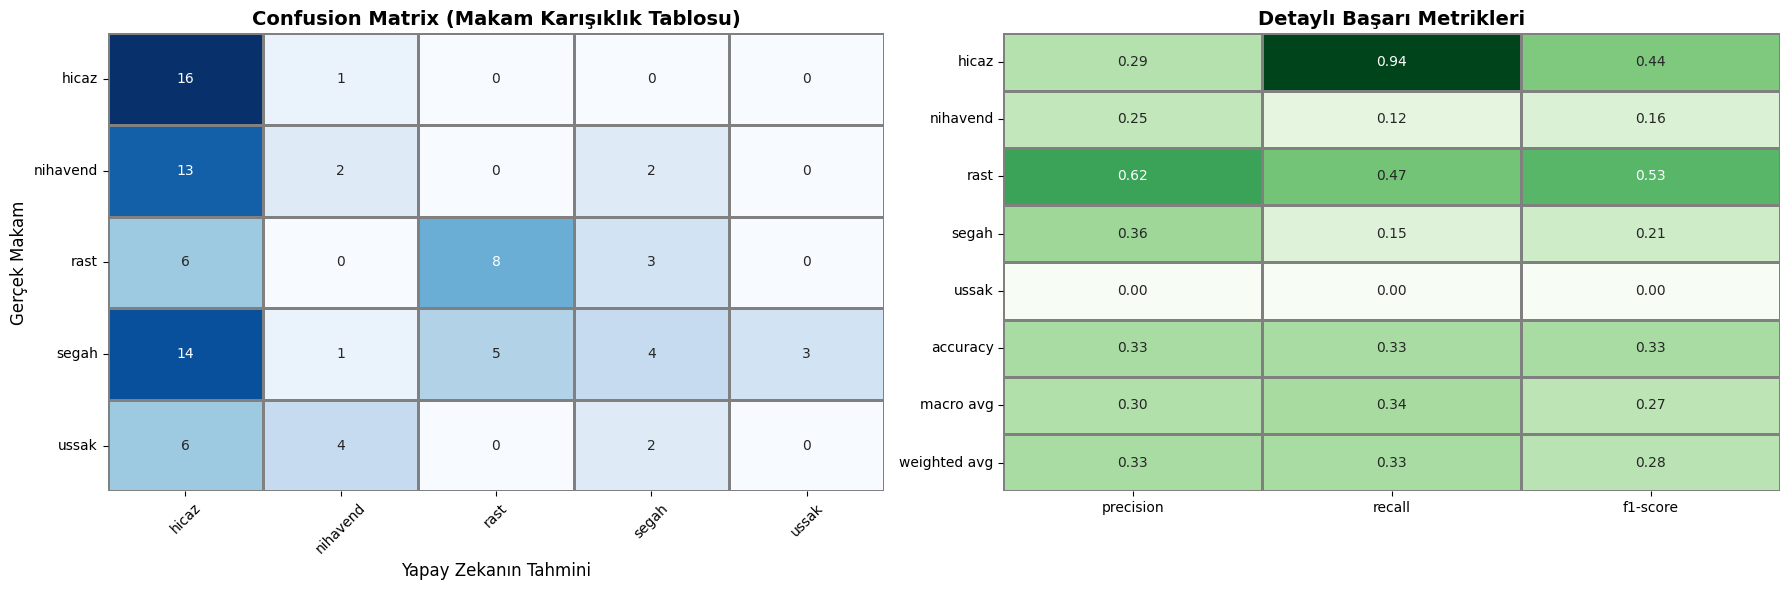

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# 1. Tahminleri Yapalım (Test Verisi Üzerinde)
y_pred = clf_micro.predict(X_test)
makam_isimleri = sorted(list(makam_folders.keys()))

# --- GÖRSELLEŞTİRME AYARLARI ---
plt.figure(figsize=(18, 6)) # Geniş bir alan açıyoruz

# --- GRAFİK 1: CONFUSION MATRIX (KARMAŞIKLIK MATRİSİ) ---
plt.subplot(1, 2, 1) # Sol tarafa çiz
cm = confusion_matrix(y_test, y_pred, labels=makam_isimleri)

# Isı haritası çizimi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='gray',
            xticklabels=makam_isimleri, yticklabels=makam_isimleri, cbar=False)

plt.title('Confusion Matrix (Makam Karışıklık Tablosu)', fontsize=14, fontweight='bold')
plt.xlabel('Yapay Zekanın Tahmini', fontsize=12)
plt.ylabel('Gerçek Makam', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# --- GRAFİK 2: SINIFLANDIRMA RAPORU (Tablo Görünümü) ---
plt.subplot(1, 2, 2) # Sağ tarafa çiz

# Raporu sözlük (dictionary) formatında alıp DataFrame'e çeviriyoruz
report_dict = classification_report(y_test, y_pred, target_names=makam_isimleri, output_dict=True)
df_report = pd.DataFrame(report_dict).iloc[:-1, :].T # Son satırları (avg) temizleyip ters çeviriyoruz

# Başarı haritası çizimi
sns.heatmap(df_report, annot=True, cmap='Greens', fmt='.2f', linewidths=1, linecolor='gray', cbar=False)

plt.title('Detaylı Başarı Metrikleri', fontsize=14, fontweight='bold')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()